#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 10
**CH10A Understanding the gender difference in earnings**

using the cps-earnings dataset

version 1.0 2021-05-05

In [5]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from datetime import datetime
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mizani import transforms
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import pyfixest as pf

warnings.filterwarnings("ignore")


In [6]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/cps-earnings/clean/"
data_out = dirname + "da_case_studies/ch10-gender-earnings-understand/"
output = dirname + "da_case_studies/ch10-gender-earnings-understand/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)


In [7]:
# Import the prewritten helper functions
from py_helper_functions import *


In [8]:
cps = pd.read_csv(data_in + "morg-2014-emp.csv")


In [9]:
cps = cps.query("uhours>=20 & earnwke>0 & age>=24 & age<=64 & grade92>=44")


In [10]:
# CREATE VARIABLES
cps["female"] = (cps.sex == 2).astype(int)
cps["w"] = cps["earnwke"] / cps["uhours"]
cps["lnw"] = np.log(cps["w"])
## Write out to csv
cps.to_csv(data_out + "earnings_multireg.csv")


In [11]:
#####################
# DISTRIBUTION OF EARNINGS
#######################
cps.loc[:, ["earnwke", "uhours", "w"]].describe()


,earnwke,uhours,w
count,18241.00000,18241.000000,18241.000000
mean,1481.78936,42.970780,34.525791
std,747.92426,9.139368,16.654215
min,0.01000,20.000000,0.000200
25%,923.00000,40.000000,21.634500
50%,1346.00000,40.000000,31.250000
75%,1923.07000,47.000000,45.673000
max,2884.61000,99.000000,144.230500


In [12]:
cps.loc[cps.w >= 1, ["earnwke", "uhours", "w"]].describe()


,earnwke,uhours,w
count,18220.000000,18220.000000,18220.000000
mean,1483.491212,42.970088,34.565432
std,746.672256,9.135281,16.622801
min,38.000000,20.000000,1.025556
25%,923.000000,40.000000,21.634500
50%,1346.000000,40.000000,31.250000
75%,1923.070000,47.000000,45.673000
max,2884.610000,99.000000,144.230500


### Table 10.1 Gender differences in earnings – log earnings and gender

In [13]:
# use robust std
reg = pf.feols(fml="lnw~female", data=cps, vcov = "hetero")
reg2 = pf.feols(fml="lnw~female+age", data=cps, vcov = "hetero")
reg3 = pf.feols(fml="age~female", data=cps, vcov = "hetero")


In [32]:
reg2.get_performance

In [26]:
pf.etable([reg, reg2, reg3], digits = 3,
          labels={"lnw":"ln wage","Intercept":"Constant"},
          keep=["female","age","Intercept"],
          type = "gt",
          )


GT(_tbl_data=                                    (1)                     (2)  \
0        female  -0.195*** <br> (0.008)  -0.185*** <br> (0.008)   
1           age                           0.007*** <br> (0.000)   
2      Constant   3.514*** <br> (0.006)   3.198*** <br> (0.018)   
3  Observations                   18241                   18241   
4     S.E. type                  hetero                  hetero   
5            R2                   0.028                   0.046   

                      (3)     rowtype  
0  -1.484*** <br> (0.159)        coef  
1                                coef  
2  44.630*** <br> (0.116)        coef  
3                   18241  modelstats  
4                  hetero  modelstats  
5                   0.005  modelstats  , _body=<great_tables._gt_data.Body object at 0x0000024504196710>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.stub: 2>, column_label='', column_align='left', column_width=None), ColInfo(var='(1)', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='(2)', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='(3)', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='rowtype', type=<ColInfoTypeEnum.row_group: 3>, column_label='rowtype', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000245042804D0>, _spanners=Spanners([SpannerInfo(spanner_id='ln wage', spanner_level=1, spanner_label='ln wage', spanner_units=None, spanner_pattern=None, vars=['(1)', '(2)'], built=None), SpannerInfo(spanner_id='age', spanner_level=1, spanner_label='age', spanner_units=None, spanner_pattern=None, vars=['(3)'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x0000024504148710>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', v

In [16]:
#stargazer does not work, with pf
stargazer = Stargazer([reg, reg2, reg3])

NotImplementedError: <class 'pyfixest.estimation.feols_.Feols'>

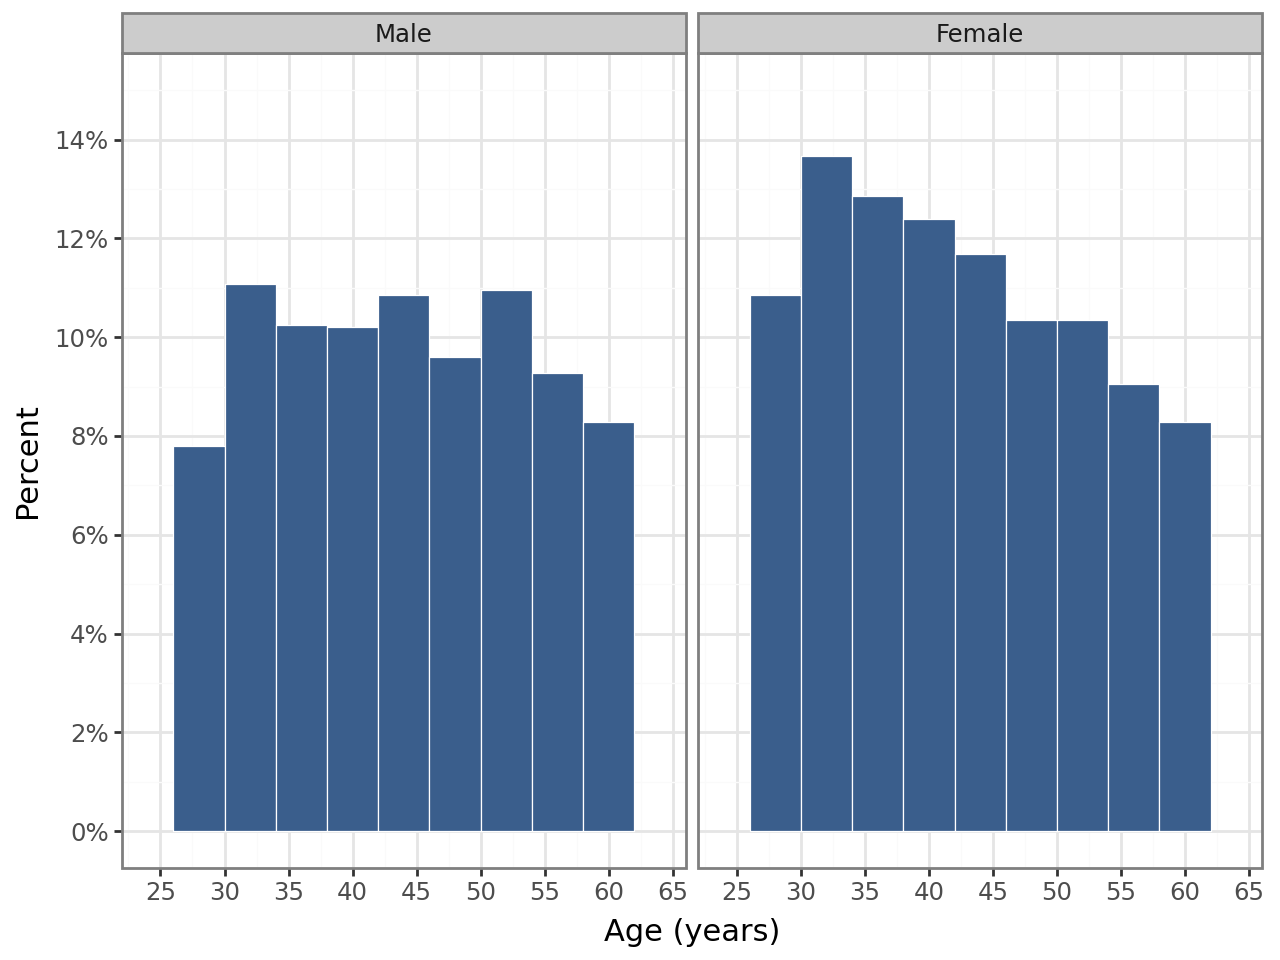

In [33]:
(
    ggplot(cps, aes(x="age", y="2*stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=4,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Age (years)", y="Percent")
    + facet_wrap("~female", labeller={"0": "Male", "1": "Female"})
    + labs(x="Age (years)", y="Percent")
    + scale_x_continuous(
        limits=(24, 64),
        breaks=seq(25, 65, by=5),
    )
    + scale_y_continuous(
        limits=(0, 0.15), breaks=seq(0, 0.15, by=0.02), labels=percent_format()
    )
    + theme_bw()
)


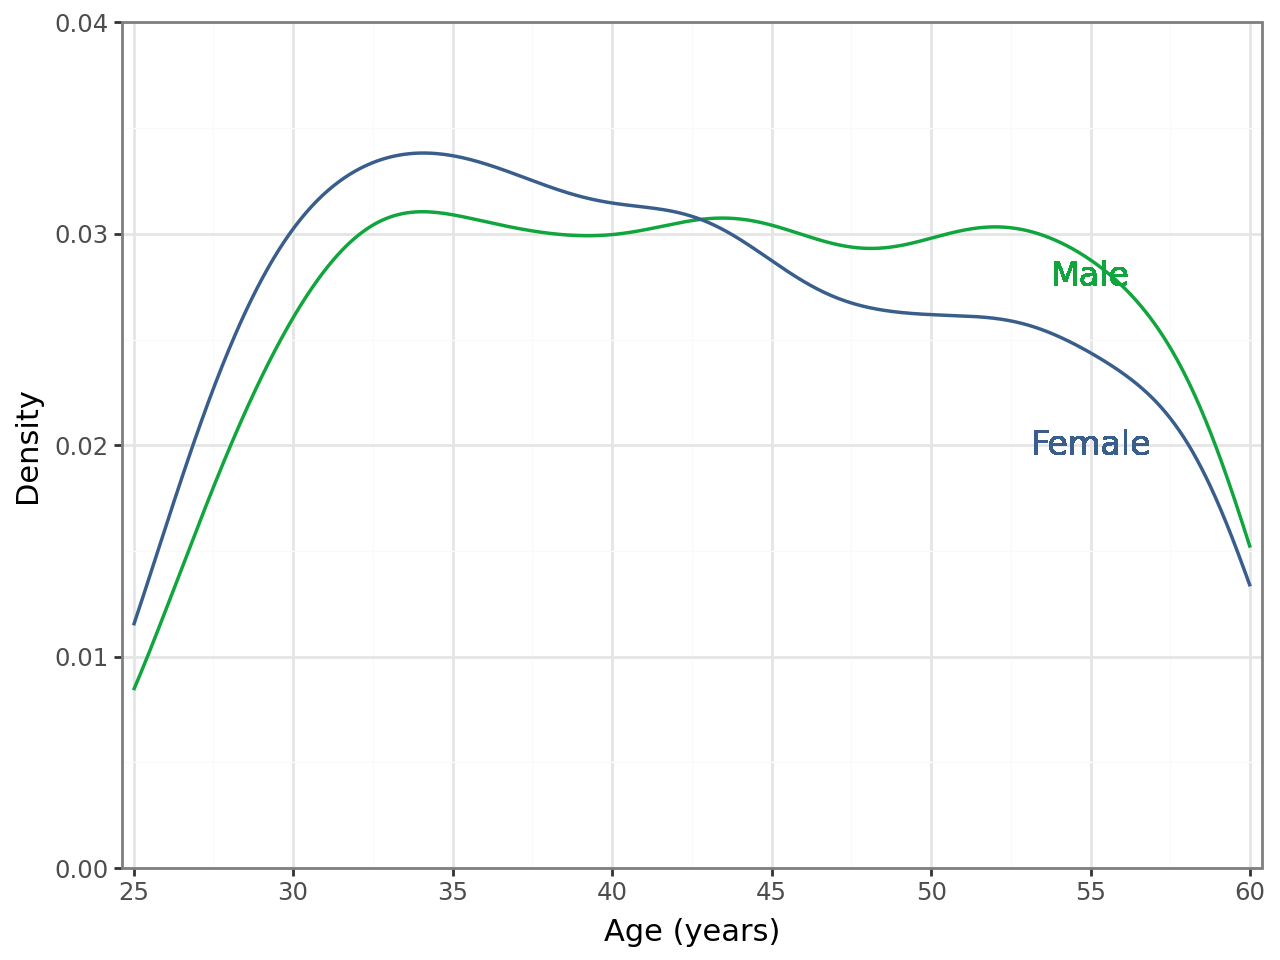

In [34]:
(
    ggplot(cps, aes(x="age", y="stat(density)", color="factor(female)"))
    + geom_density(adjust=1.5, show_legend=False, na_rm=True, size=0.7)
    + labs(x="Age (years)", y="Density", color="")
    + scale_color_manual(
        name="", values=(color[1], color[0]), labels=("Male", "Female")
    )
    + scale_x_continuous(expand=(0.01, 0.01), limits=(25, 60), breaks=seq(25, 60, by=5))
    + scale_y_continuous(
        expand=(0.0, 0.0), limits=(0, 0.04), breaks=seq(0, 0.04, by=0.01)
    )
    + geom_text(aes(x=55, y=0.028, label="'Male'"), color=color[1], size=12)
    + geom_text(aes(x=55, y=0.020, label="'Female'"), color=color[0], size=12)
    + theme_bw()
)


### Table 10.2 Gender differences in earnings – log earnings and age, various functional forms

In [36]:
cps["agesq"] = np.power(cps["age"], 2)
cps["agecu"] = np.power(cps["age"], 3)
cps["agequ"] = np.power(cps["age"], 4)


In [37]:
reg4 = pf.feols(fml="lnw~female", data=cps, vcov = "hetero")
reg5 = pf.feols(fml="lnw~female+age", data=cps, vcov = "hetero")
reg6 = pf.feols(fml="lnw~female+age+agesq", data=cps, vcov = "hetero")
reg7 = pf.feols(fml="lnw~female+age+agesq+agecu+agequ", data=cps, vcov = "hetero")


In [39]:
pf.etable([reg4,reg5,reg6,reg7], digits = 3,
          labels={"lnw":"ln wage","Intercept":"Constant"},
          keep=["female","age","Intercept"],
          type = "gt",
          )


GT(_tbl_data=                                    (1)                     (2)  \
0        female  -0.195*** <br> (0.008)  -0.185*** <br> (0.008)   
1           age                           0.007*** <br> (0.000)   
2         agesq                                                   
3         agecu                                                   
4         agequ                                                   
5      Constant   3.514*** <br> (0.006)   3.198*** <br> (0.018)   
6  Observations                   18241                   18241   
7     S.E. type                  hetero                  hetero   
8            R2                   0.028                   0.046   

                      (3)                     (4)     rowtype  
0  -0.183*** <br> (0.008)  -0.183*** <br> (0.008)        coef  
1   0.063*** <br> (0.003)   0.572*** <br> (0.116)        coef  
2  -0.001*** <br> (0.000)  -0.017*** <br> (0.004)        coef  
3                           0.000*** <br> (0.000)        coef  
4                           -0.000** <br> (0.000)        coef  
5   2.027*** <br> (0.073)   -3.606** <br> (1.178)        coef  
6                   18241                   18241  modelstats  
7                  hetero                  hetero  modelstats  
8                   0.060                   0.062  modelstats  , _body=<great_tables._gt_data.Body object at 0x000002451068C750>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.stub: 2>, column_label='', column_align='left', column_width=None), ColInfo(var='(1)', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='(2)', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='(3)', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='(4)', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None), ColInfo(var='rowtype', type=<ColInfoTypeEnum.row_group: 3>, column_label='rowtype', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000002451A8CE410>, _spanners=Spanners([SpannerInfo(spanner_id='ln wage', spanner_level=1, spanner_label='ln wage', spanner_units=None, spanner_pattern=None, vars=['(1)', '(2)', '(3)', '(4)'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000002451A8CCA10>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFF

### Table 10.3 Gender differences in earnings – log earnings, gender and education

In [41]:
cps["ed_MA"] = (cps["grade92"] == 44).astype(int)
cps["ed_Profess"] = (cps["grade92"] == 45).astype(int)
cps["ed_Phd"] = (cps["grade92"] == 46).astype(int)


In [42]:
reg8 = pf.feols(fml="lnw~female", data=cps, vcov = "hetero")
reg9 = pf.feols(fml="lnw~female + ed_Profess + ed_Phd", data=cps, vcov = "hetero")
reg10 = pf.feols(fml="lnw~female + ed_Profess + ed_MA", data=cps, vcov = "hetero")

In [44]:
pf.etable([reg8, reg9, reg10],
          keep = ["female", "ed_Profess", "ed_Phd", "ed_MA", "Intercept"],
          labels={"Intercept":"Constant"})

GT(_tbl_data=                                    (1)                     (2)  \
0        female  -0.195*** <br> (0.008)  -0.182*** <br> (0.009)   
1    ed_Profess                           0.134*** <br> (0.015)   
2        ed_Phd                           0.136*** <br> (0.013)   
3         ed_MA                                                   
4      Constant   3.514*** <br> (0.006)   3.473*** <br> (0.007)   
5  Observations                   18241                   18241   
6     S.E. type                  hetero                  hetero   
7            R2                   0.028                   0.038   

                      (3)     rowtype  
0  -0.182*** <br> (0.009)        coef  
1     -0.002 <br> (0.018)        coef  
2                                coef  
3  -0.136*** <br> (0.013)        coef  
4   3.609*** <br> (0.013)        coef  
5                   18241  modelstats  
6                  hetero  modelstats  
7                   0.038  modelstats  , _body=<great_tables._gt_data.Body object at 0x000002451F121DD0>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.stub: 2>, column_label='', column_align='left', column_width=None), ColInfo(var='(1)', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='(2)', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='(3)', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='rowtype', type=<ColInfoTypeEnum.row_group: 3>, column_label='rowtype', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000002451F140650>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['(1)', '(2)', '(3)'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000002451F1476D0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), ta

### Table 10.4 Gender differences in earnings – log earnings, gender, age, and their interaction

In [45]:
reg11 = pf.feols(fml="lnw~age", data=cps.query("female==1"), vcov = "hetero")
reg12 = pf.feols(fml="lnw~age", data=cps.query("female==0"), vcov = "hetero")
reg13 = pf.feols(fml="lnw~female+age+age*female", data=cps, vcov = "hetero")

In [57]:
pf.etable([reg11, reg12, reg13],
          keep = ["female", "age", "age:female", "Intercept"],
          labels={"Intercept":"Constant"},
          exact_match = True
          )


GT(_tbl_data=                                   (1)                    (2)  \
0        female                                                 
1           age  0.006*** <br> (0.001)  0.009*** <br> (0.001)   
2  age x female                                                 
3      Constant  3.081*** <br> (0.023)  3.117*** <br> (0.026)   
4  Observations                   9685                   8556   
5     S.E. type                 hetero                 hetero   
6            R2                  0.011                  0.028   

                      (3)     rowtype  
0     -0.036 <br> (0.035)        coef  
1   0.009*** <br> (0.001)        coef  
2  -0.003*** <br> (0.001)        coef  
3   3.117*** <br> (0.026)        coef  
4                   18241  modelstats  
5                  hetero  modelstats  
6                   0.047  modelstats  , _body=<great_tables._gt_data.Body object at 0x000002451A8B4750>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.stub: 2>, column_label='', column_align='left', column_width=None), ColInfo(var='(1)', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='(2)', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='(3)', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='rowtype', type=<ColInfoTypeEnum.row_group: 3>, column_label='rowtype', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000002451F2D9E10>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['(1)', '(2)', '(3)'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000002451F298AD0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsIn

### Figure 10.2 Earning differences by gender as function of age
FOR RPEDICTIONL FUNCTIONAL FORMS & INTERACTIONS WITH GENDER

In [61]:
reg14 = pf.feols(fml="lnw~age+agesq+agecu+agequ", data=cps.query("female==1"), vcov = "hetero")
reg15 = pf.feols(fml="lnw~age+agesq+agecu+agequ", data=cps.query("female==0"), vcov = "hetero")
reg16 = pf.feols(fml="lnw ~ age + agesq + agecu + agequ + female + female*age + female*agesq + female*agecu + female*agequ",data=cps, vcov = "hetero")


In [62]:
pf.etable([reg14, reg15, reg16])

GT(_tbl_data=                                     (1)                  (2)  \
0      Intercept  -5.453*** <br> (1.622)  -1.857 <br> (1.707)   
1            age   0.738*** <br> (0.160)  0.391* <br> (0.167)   
2          agesq  -0.023*** <br> (0.006)  -0.011 <br> (0.006)   
3          agecu   0.000*** <br> (0.000)   0.000 <br> (0.000)   
4          agequ   -0.000** <br> (0.000)  -0.000 <br> (0.000)   
5         female                                                
6     female:age                                                
7   female:agesq                                                
8   female:agecu                                                
9   female:agequ                                                
10  Observations                    9685                 8556   
11     S.E. type                  hetero               hetero   
12            R2                   0.027                0.050   

                    (3)     rowtype  
0   -1.857 <br> (1.707)        coef  
1   0.391* <br> (0.167)        coef  
2   -0.011 <br> (0.006)        coef  
3    0.000 <br> (0.000)        coef  
4   -0.000 <br> (0.000)        coef  
5   -3.596 <br> (2.355)        coef  
6    0.347 <br> (0.231)        coef  
7   -0.012 <br> (0.008)        coef  
8    0.000 <br> (0.000)        coef  
9   -0.000 <br> (0.000)        coef  
10                18241  modelstats  
11               hetero  modelstats  
12                0.065  modelstats  , _body=<great_tables._gt_data.Body object at 0x0000024504D4C750>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.stub: 2>, column_label='', column_align='left', column_width=None), ColInfo(var='(1)', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='(2)', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='(3)', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='rowtype', type=<ColInfoTypeEnum.row_group: 3>, column_label='rowtype', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000002451F328610>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['(1)', '(2)', '(3)'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000002451F312AD0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFF

In [73]:
reg13_old = smf.ols(formula="lnw~female+age+age*female", data=cps).fit(cov_type="HC1")
reg16_old = smf.ols(
    formula="lnw ~ age + agesq + agecu + agequ + female + female*age + female*agesq + female*agecu + female*agequ",
    data=cps,
).fit(cov_type="HC1")

In [69]:
# PREDICTION AND GRAPH LINEAR
data_m = cps.query("female==0")

pred = reg13_old.predict(data_m)

pred = reg13_old.get_prediction(data_m).summary_frame()[["mean", "mean_se"]]
pred.columns = ["fit", "fit_se"]

data_m = data_m.reset_index(drop=True).join(pred)

data_m["CIup"] = data_m["fit"] + 2 * data_m["fit_se"]
data_m["CIlo"] = data_m["fit"] - 2 * data_m["fit_se"]


In [70]:
pred

,fit,fit_se
0,3.553405,0.006712
1,3.624659,0.009702
2,3.535591,0.006288
3,3.544498,0.006477
4,3.446524,0.007250
...,...,...
8551,3.597939,0.008405
8552,3.401990,0.009188
8553,3.535591,0.006288
8554,3.366363,0.011049


In [71]:
data_f = cps.query("female==1")

pred = reg13_old.predict(data_f)

pred = reg13_old.get_prediction(data_f).summary_frame()[["mean", "mean_se"]]
pred.columns = ["fit", "fit_se"]

data_f = data_f.reset_index(drop=True).join(pred)

data_f["CIup"] = data_f["fit"] + 2 * data_f["fit_se"]
data_f["CIlo"] = data_f["fit"] - 2 * data_f["fit_se"]


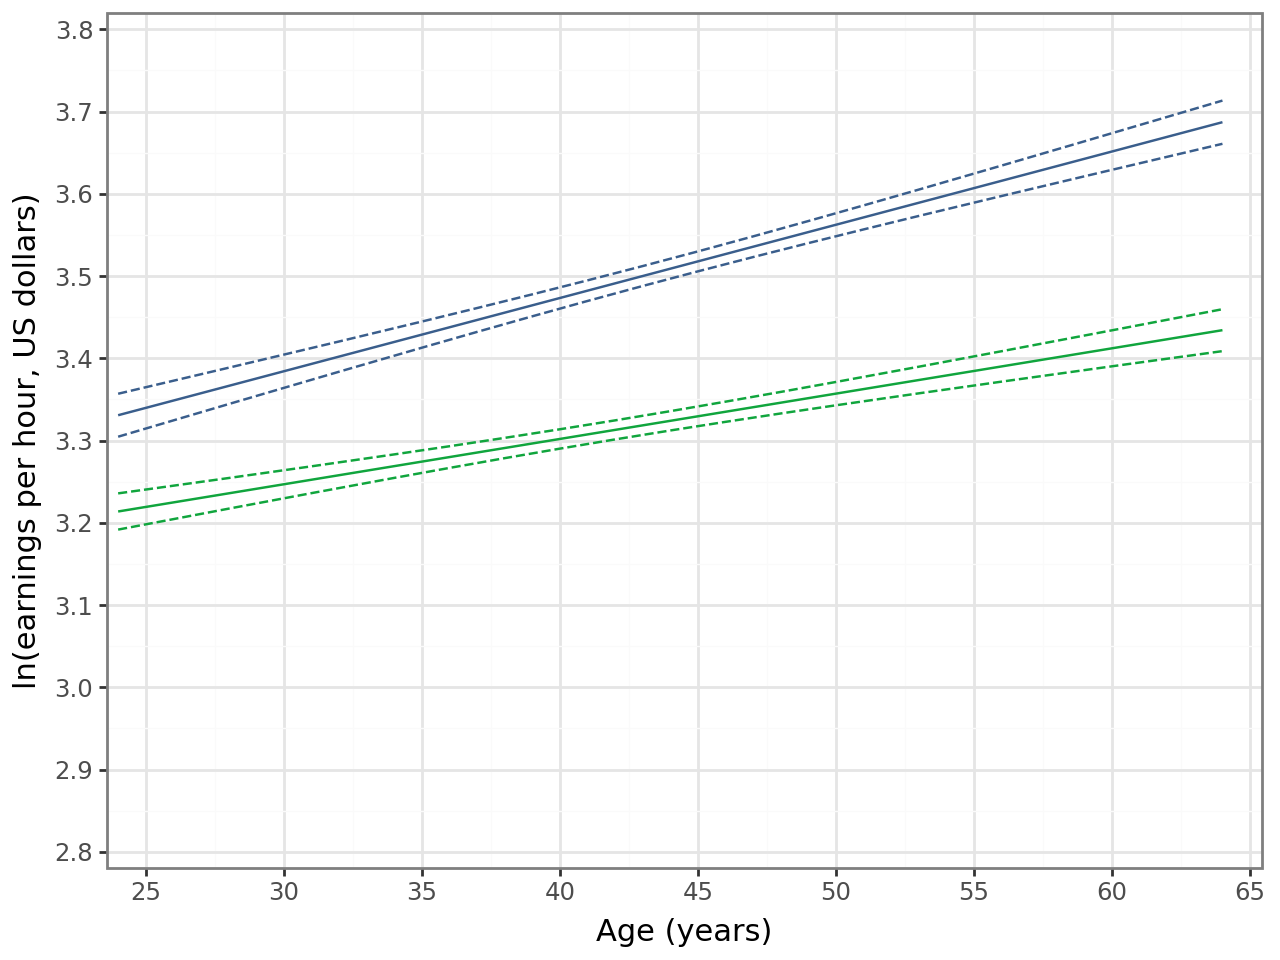

In [72]:
(
    ggplot(data_m, aes(x="age", y="fit"))
    + geom_line(colour=color[0])
    + geom_line(data_m, aes(x="age", y="CIup"), colour=color[0], linetype="dashed")
    + geom_line(data_m, aes(x="age", y="CIlo"), colour=color[0], linetype="dashed")
    + geom_line(data_f, aes(x="age", y="fit"), colour=color[1])
    + geom_line(data_f, aes(x="age", y="CIup"), colour=color[1], linetype="dashed")
    + geom_line(data_f, aes(x="age", y="CIlo"), colour=color[1], linetype="dashed")
    + labs(x="Age (years)", y="ln(earnings per hour, US dollars)")
    + scale_x_continuous(expand=(0.01, 0.01), limits=(24, 65), breaks=seq(25, 65, by=5))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(2.8, 3.8), breaks=seq(2.8, 3.8, by=0.1)
    )
    + theme_bw()
)


In [76]:
# PREDICTION AND GRAPH POLYNOMIAL
# male
data_m = cps.query("female==0")

pred = reg16_old.predict(data_m)

pred = reg16_old.get_prediction(data_m).summary_frame()[["mean", "mean_se"]]
pred.columns = ["fit", "fit_se"]

data_m = data_m.reset_index(drop=True).join(pred)

data_m["CIup"] = data_m["fit"] + 2 * data_m["fit_se"]
data_m["CIlo"] = data_m["fit"] - 2 * data_m["fit_se"]

# female
data_f = cps.query("female==1")

pred = reg16_old.predict(data_f)

pred = reg16_old.get_prediction(data_f).summary_frame()[["mean", "mean_se"]]
pred.columns = ["fit", "fit_se"]

data_f = data_f.reset_index(drop=True).join(pred)

data_f["CIup"] = data_f["fit"] + 2 * data_f["fit_se"]
data_f["CIlo"] = data_f["fit"] - 2 * data_f["fit_se"]


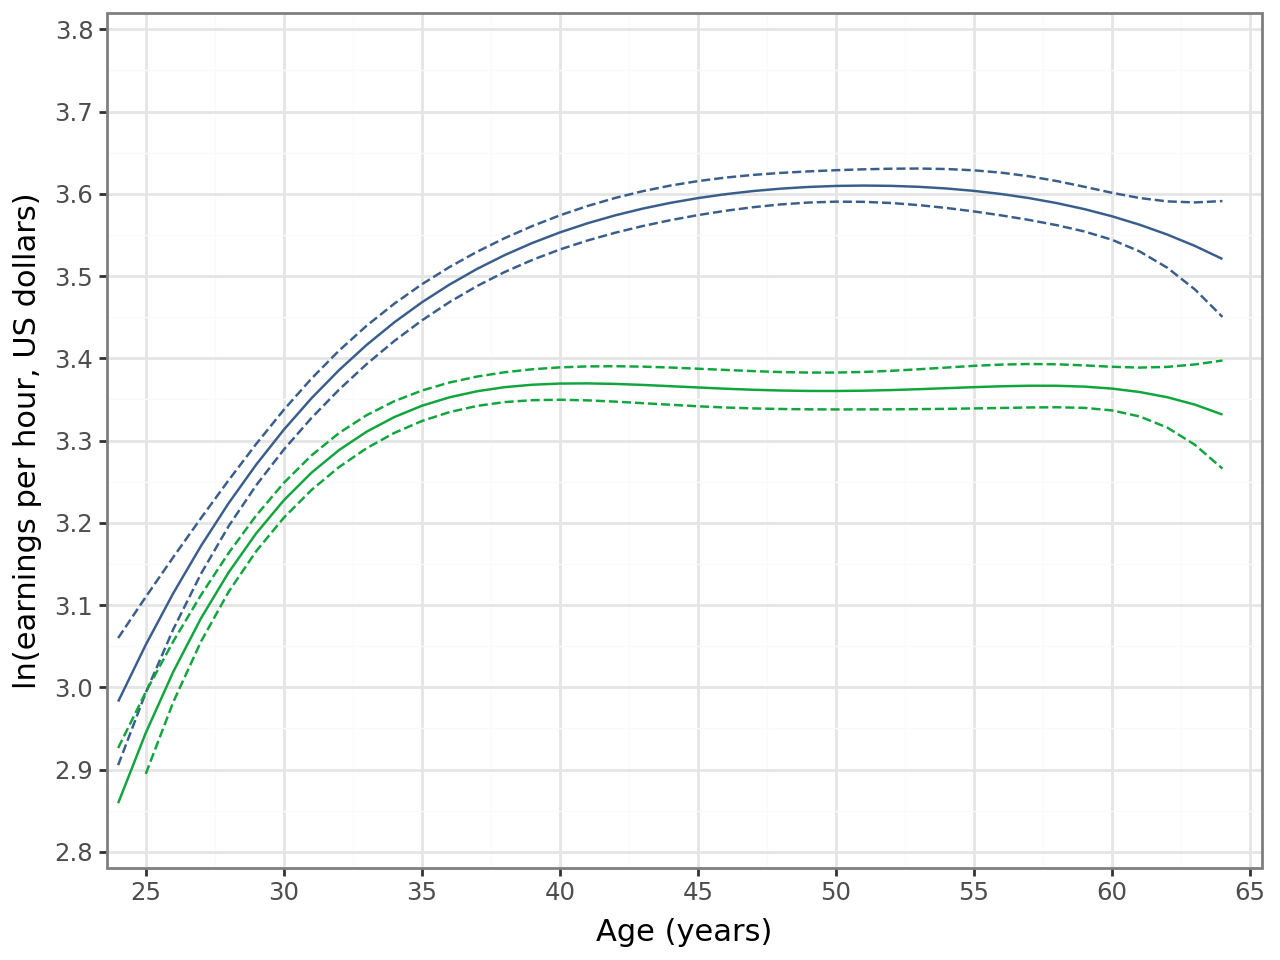

In [77]:
(
    ggplot(data_m, aes(x="age", y="fit"))
    + geom_line(colour=color[0])
    + geom_line(data_m, aes(x="age", y="CIup"), colour=color[0], linetype="dashed")
    + geom_line(data_m, aes(x="age", y="CIlo"), colour=color[0], linetype="dashed")
    + geom_line(data_f, aes(x="age", y="fit"), colour=color[1])
    + geom_line(data_f, aes(x="age", y="CIup"), colour=color[1], linetype="dashed")
    + geom_line(data_f, aes(x="age", y="CIlo"), colour=color[1], linetype="dashed")
    + labs(x="Age (years)", y="ln(earnings per hour, US dollars)")
    + scale_x_continuous(expand=(0.01, 0.01), limits=(24, 65), breaks=seq(25, 65, by=5))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(2.8, 3.8), breaks=seq(2.8, 3.8, by=0.1)
    )
    + theme_bw()
)


## Part 2
TOWARDS CAUSAL ANALYIS - IS IT DISCRIMINATION?

In [78]:
# FILTER DATA -  SELECTION of the sample we need
cps = cps.query("age>=40 & age<=60")


In [79]:
cps["white"] = (cps["race"] == 1).astype(int)
cps["afram"] = (cps["race"] == 2).astype(int)
cps["asian"] = (cps["race"] == 4).astype(int)
cps["hisp"] = (cps["ethnic"].notna()).astype(int)
cps["othernonw"] = (
    (cps["white"] == 0) & (cps["afram"] == 0) & (cps["asian"] == 0) & (cps["hisp"] == 0)
).astype(int)
cps["nonUSborn"] = (
    (cps["prcitshp"] == "Foreign Born, US Cit By Naturalization")
    | (cps["prcitshp"] == "Foreign Born, Not a US Citizen")
).astype(int)


In [80]:
# Potentially endogeneous demographics
cps["married"] = ((cps["marital"] == 1) | (cps["marital"] == 2)).astype(int)
cps["divorced"] = ((cps["marital"] == 3) & (cps["marital"] == 5)).astype(int)
cps["wirowed"] = (cps["marital"] == 4).astype(int)
cps["nevermar"] = (cps["marital"] == 7).astype(int)

cps["child0"] = (cps["chldpres"] == 0).astype(int)
cps["child1"] = (cps["chldpres"] == 1).astype(int)
cps["child2"] = (cps["chldpres"] == 2).astype(int)
cps["child3"] = (cps["chldpres"] == 3).astype(int)
cps["child4pl"] = (cps["chldpres"] >= 4).astype(int)

# Work-related variables
cps["fedgov"] = (cps["class"] == "Government - Federal").astype(int)
cps["stagov"] = (cps["class"] == "Government - State").astype(int)
cps["locgov"] = (cps["class"] == "Government - Local").astype(int)
cps["nonprof"] = (cps["class"] == "Private, Nonprofit").astype(int)
cps["ind2dig"] = ((pd.Categorical(cps["ind02"]).codes + 1) / 100).astype(int)
cps["occ2dig"] = (cps["occ2012"] / 100).astype(int)
cps["union"] = ((cps["unionmme"] == "Yes") | (cps["unioncov"] == "Yes")).astype(int)


In [81]:
cps["uhourssq"] = np.power(cps["uhours"], 2)
cps["uhourscu"] = np.power(cps["uhours"], 3)
cps["uhoursqu"] = np.power(cps["uhours"], 4)


### Table 10.5 Gender differences in earnings – regression with many covariates on a narrower sample

In [83]:
# Extended regressions
reg1 = pf.feols(fml="lnw ~ female", data=cps, vcov = "hetero")
reg2 = pf.feols(fml="lnw ~ female + age + ed_Profess + ed_Phd", data=cps, vcov = "hetero")
reg3 = pf.feols(fml="lnw~female + age + afram + hisp + asian + othernonw + nonUSborn + ed_Profess + ed_Phd + married + divorced+ wirowed + child1 + child2 + child3 +child4pl + C(stfips) + uhours + fedgov + stagov + locgov + nonprof + union + C(ind2dig) + C(occ2dig)", data=cps, vcov = "hetero")
reg4 = pf.feols(fml="lnw~female + age + afram + hisp + asian + othernonw + nonUSborn + ed_Profess + ed_Phd + married + divorced+ wirowed + child1 + child2 + child3 +child4pl + C(stfips) + uhours + fedgov + stagov + locgov + nonprof + union + C(ind2dig) + C(occ2dig) + agesq + agecu + agequ + uhoursqu + uhourscu + uhourssq", data=cps, vcov = "hetero")

In [84]:
pf.etable([reg1,reg2,reg3,reg4])


GT(_tbl_data=                                      (1)                     (2)  \
0       Intercept   3.590*** <br> (0.008)   3.542*** <br> (0.049)   
1          female  -0.224*** <br> (0.012)  -0.212*** <br> (0.012)   
2             age                              0.000 <br> (0.001)   
3      ed_Profess                           0.138*** <br> (0.022)   
4          ed_Phd                           0.105*** <br> (0.016)   
..            ...                     ...                     ...   
165      uhourscu                                                   
166      uhourssq                                                   
167  Observations                    9816                    9816   
168     S.E. type                  hetero                  hetero   
169            R2                   0.036                   0.043   

                        (3)                     (4)     rowtype  
0     3.852*** <br> (0.079)   -56.714 <br> (37.108)        coef  
1    -0.150*** <br> (0.012)  -0.140*** <br> (0.012)        coef  
2        0.002 <br> (0.001)      4.970 <br> (3.015)        coef  
3        0.048 <br> (0.026)      0.049 <br> (0.026)        coef  
4     0.068*** <br> (0.017)   0.070*** <br> (0.017)        coef  
..                      ...                     ...         ...  
165                           -0.000** <br> (0.000)        coef  
166                              0.002 <br> (0.001)        coef  
167                    9816                    9816  modelstats  
168                  hetero                  hetero  modelstats  
169                   0.182                   0.195  modelstats  

[170 rows x 6 columns], _body=<great_tables._gt_data.Body object at 0x000002451F323010>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.stub: 2>, column_label='', column_align='left', column_width=None), ColInfo(var='(1)', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='(2)', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='(3)', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='(4)', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None), ColInfo(var='rowtype', type=<ColInfoTypeEnum.row_group: 3>, column_label='rowtype', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000245270BE910>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['(1)', '(2)', '(3)', '(4)'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000245270AE5D0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(sc